In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import datetime as dt
from sklearn.model_selection import train_test_split
import pafy
import os
from collections import deque
from moviepy.editor import *

In [59]:
physical_device = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
    print("error")


In [60]:
 features  = ["breakdancing", "calligraphy", "celebrating", "claypotterymaking", "climbingarope",
           "cookingoncampfire","eatingicecream","golfdriving","pushup","raisingeyebrows", "ridingscooter"]

In [61]:
file_dir = 'Technocolab_data'
def dataset(file_directory):
    featured = []
    labelled = []
    for feature in features:
        label = features.index(feature)
        file = os.path.join(file_dir, feature)
        for path in os.listdir(file):
            img = os.path.join(file, path)
            images = cv2.imread(img)
            images = cv2.resize(images, (64,64))
            images = np.expand_dims(images, axis=0)
            featured.append(images)
            labelled.append(label)
    print("Done!!!")
    return featured, labelled
        

In [62]:
feature, label = dataset(file_dir)

Done!!!


In [63]:
feature = np.array(feature)
label = np.array(label)
print(feature.shape), print(label.shape)

(29600, 1, 64, 64, 3)
(29600,)


(None, None)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.20, shuffle = True, random_state = 10)

In [118]:
def models():
    inputs_data = keras.Input(shape = (1,64,64,3))
    x = layers.Conv2D(64, 3)(inputs_data)
    x = keras.activations.relu(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool3D(pool_size=(1, 2, 2))(x)
    x = layers.Conv2D(64, 3)(x)
    x = keras.activations.relu(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool3D(pool_size=(1, 2, 2))(x)
    x = layers.Conv2D(64, 3)(x)
    x = keras.activations.relu(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool3D(pool_size=(1, 2, 2))(x)
    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(256)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(11)(x)
    model = keras.Model(inputs = inputs_data, outputs = outputs)
    return model


In [119]:
model = models()

In [120]:
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1, 64, 64, 3)]    0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 62, 62, 64)     1792      
_________________________________________________________________
tf.nn.relu_15 (TFOpLambda)   (None, 1, 62, 62, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 62, 62, 64)     256       
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 1, 31, 31, 64)     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 29, 29, 64)     36928     
_________________________________________________________________
tf.nn.relu_16 (TFOpLambda)   (None, 1, 29, 29, 64)     0   

In [99]:
#plot_model(model, to_file = 'HAR_structure_plot.png', show_shapes = True, show_layer_names = True)

In [121]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          optimizer=keras.optimizers.Adam(lr=3e-4),
          metrics=['accuracy'])

Epoch 1/30
296/296 - 42s - loss: 0.9958 - accuracy: 0.6973 - val_loss: 0.6237 - val_accuracy: 0.8549
Epoch 2/30
296/296 - 39s - loss: 0.1922 - accuracy: 0.9561 - val_loss: 0.1194 - val_accuracy: 0.9761
Epoch 3/30
296/296 - 39s - loss: 0.0872 - accuracy: 0.9770 - val_loss: 0.1843 - val_accuracy: 0.9455
Epoch 4/30
296/296 - 39s - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 5/30
296/296 - 39s - loss: 0.0438 - accuracy: 0.9848 - val_loss: 0.0394 - val_accuracy: 0.9804
Epoch 6/30
296/296 - 39s - loss: 0.0358 - accuracy: 0.9860 - val_loss: 0.0398 - val_accuracy: 0.9816
Epoch 7/30
296/296 - 39s - loss: 0.0394 - accuracy: 0.9842 - val_loss: 0.0596 - val_accuracy: 0.9747
Epoch 8/30
296/296 - 39s - loss: 0.0260 - accuracy: 0.9878 - val_loss: 0.0350 - val_accuracy: 0.9816
Epoch 9/30
296/296 - 39s - loss: 0.0274 - accuracy: 0.9875 - val_loss: 0.0518 - val_accuracy: 0.9814
Epoch 10/30
296/296 - 39s - loss: 0.0329 - accuracy: 0.9864 - val_loss: 0.1511 - val_accura

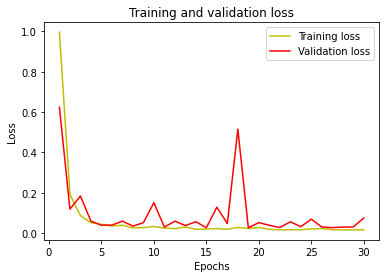

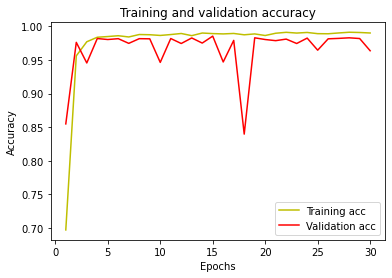

In [122]:
result = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split = 0.2, verbose=2)

loss =result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

93/93 - 5s - loss: 0.0635 - accuracy: 0.9698


[0.06345667690038681, 0.9697635173797607]

In [124]:
model.save('HARfinal.h5')

In [125]:
url = 'https://www.youtube.com/watch?v=vGBTKM8bKF8'
output_directory = 'youtube3'

In [126]:
def youtube_download(url, output_directory ):
    video = pafy.new(url)
    title = video.title
    video_file = video.getbest()
    output_path = f'{output_directory}/{title}.mp4'
    video_file.download(filepath = output_path, quiet=True)
    return title

In [127]:
title = youtube_download(url, output_directory)
title

'Clay flower 🌺 pot 😄.#pottery #clay #potterywheel #claypots #homestudio'

In [128]:
test_videos_directory = 'youtube3'
os.makedirs(test_videos_directory, exist_ok = True)
input_video_file_path = f'{test_videos_directory}/{title}.mp4'

In [129]:
SEQUENCE_LENGTH = 1
def predict_video(input_file, output_file, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(input_file)
    
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    video_writer = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
    
    predicted_class_name = ''
 
    while video_reader.isOpened():
 
        ok, frame = video_reader.read() 
        
        if not ok:
            break
 
        resized_frame = cv2.resize(frame, (64, 64))
        frames_queue.append(resized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            predicted_labels_probabilities = model.predict(np.expand_dims(frames_queue, axis = 0))[0]
            

            predicted_label = np.argmax(predicted_labels_probabilities)
 
            predicted_class_name = features[predicted_label]
 
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
 
        video_writer.write(frame)
    video_reader.release()
    video_writer.release()

In [130]:
output_video_file_path = f'{test_videos_directory}/{title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'
 
# Perform Action Recognition on the Test Video.
predict_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
 
# Display the output video.
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [131]:
model=tf.keras.models.load_model("HARfinal.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,tf.lite.OpsSet.SELECT_TF_OPS ]
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpdnl599mi\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpdnl599mi\assets


395184